# **Heart Attack Dataset Unsupervised Analysis**


## **1. Import**

### 1.1. General Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics as metrics
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [3]:
import numpy.random as r # We will randomly initialize our weights
from sklearn.metrics import accuracy_score # 

## **2. Preparing Data**

### 2.1. Importing Data

In [4]:
df = pd.read_csv('heart.csv')
data = df.to_numpy()

In [5]:
df.shape

(303, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X = data[:, :-1]
y = data[:, -1]

# Unsupervised analysis

## Plot histograms for numerical features

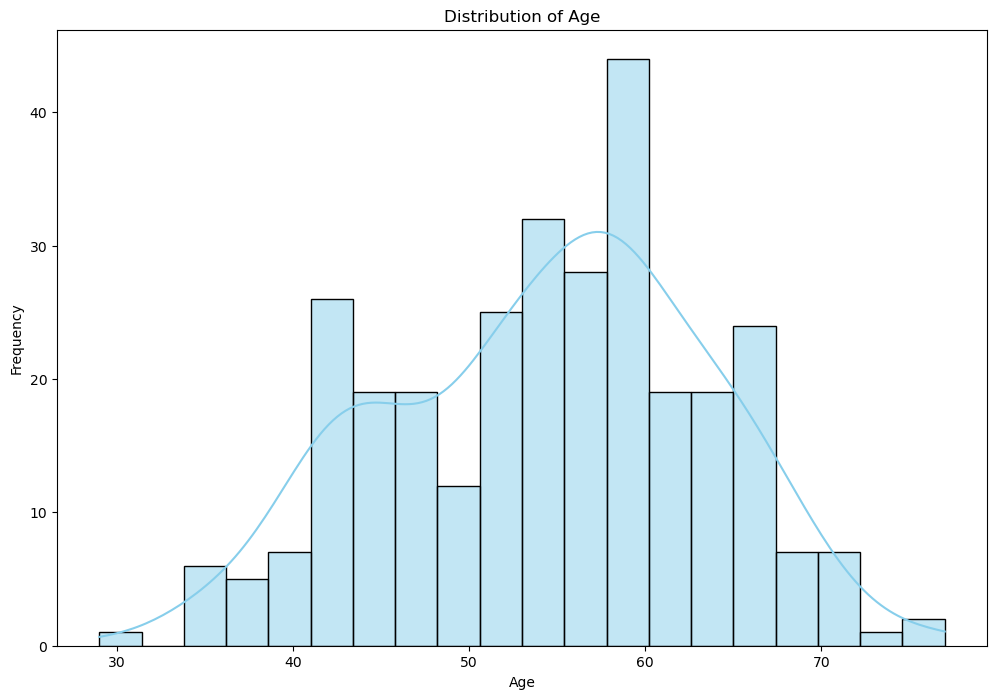

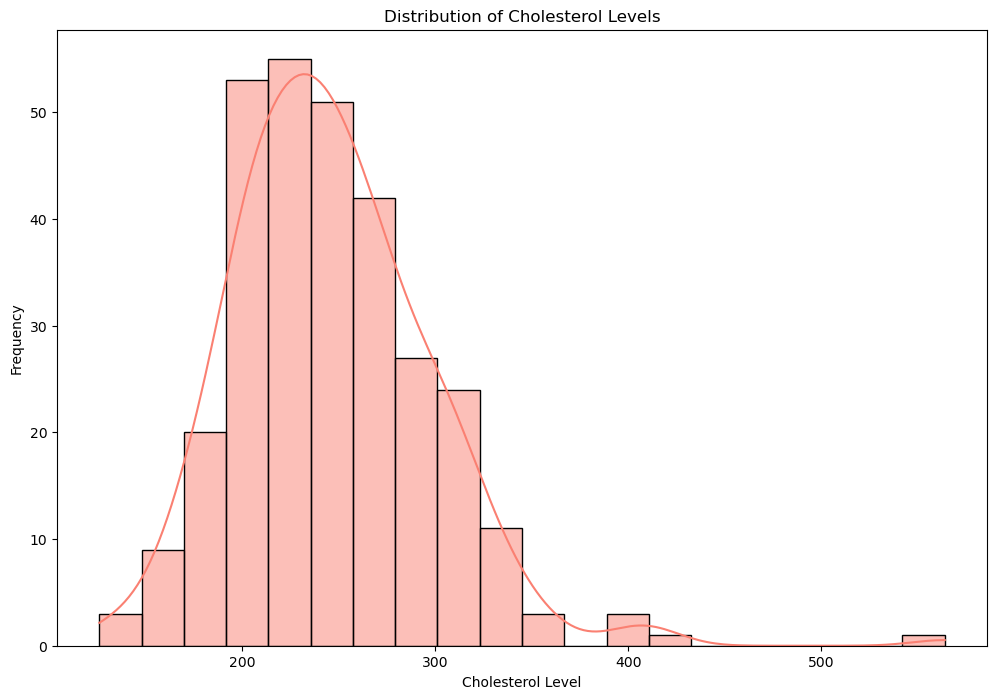

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(data[:, 0], bins=20, kde=True, color='skyblue')  # Assuming 'age' is the first column
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data[:, 4], bins=20, kde=True, color='salmon')  # Assuming 'chol' is the fifth column
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

## Plot bar plot for target variable

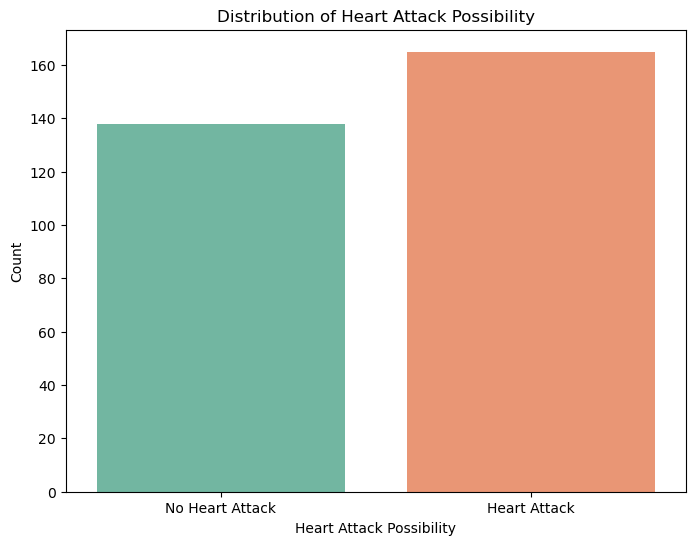

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data[:, -1], palette='Set2')  # Assuming 'output' is the last column
plt.title('Distribution of Heart Attack Possibility')
plt.xlabel('Heart Attack Possibility')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.show()

## K-means clustering

### Information about some important features
* **Oldpeak**: Oldpeak refers to the depression of the ST segment during exercise relative to rest. It is measured in millimeters and provides information about abnormal changes in the heart's electrical activity during exercise compared to rest. Oldpeak is often used as a predictor of coronary artery disease.
* **Thalassemia**: Thalassemia is a genetic disorder characterized by abnormal hemoglobin production, leading to a reduction in the production of one or more globin chains in hemoglobin. In the dataset context, the 'thal' feature likely represents different types or severities of thalassemia. Common values for 'thal' include normal, fixed defect, and reversible defect.
* **Slope**: Slope refers to the slope of the peak exercise ST segment. It provides information about the rate of change of the ST segment during peak exercise and can indicate the severity of coronary artery disease. The slope can be categorized into three types: upsloping, flat, and downsloping, representing different levels of risk for coronary artery disease.

C:\Users\vnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


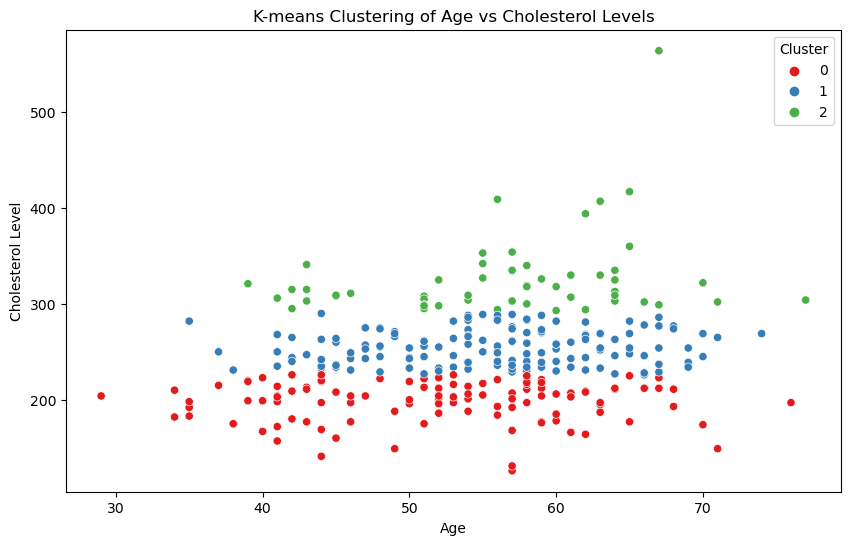

In [10]:
from sklearn.cluster import KMeans

# Select relevant features for clustering (e.g., age and cholesterol levels)
X = data[:, [0, 4]]  # 'age' is the first column and 'chol' is the fifth column

# Define the number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='Set1', legend='full')
plt.title('K-means Clustering of Age vs Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Cluster')
plt.show()


While using K-means, we notices that the clusters appear to be aligned horizontally, which suggests that the cholesterol level features seem to have a bigger impact than age.

We then realized this might be due to different scales (chol is in the hundreds while age is from 30-70). We then decide to normalize the features before clustering.

### Normalizing features for K-means

In [11]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

### Applying K-means with normalized data

C:\Users\vnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


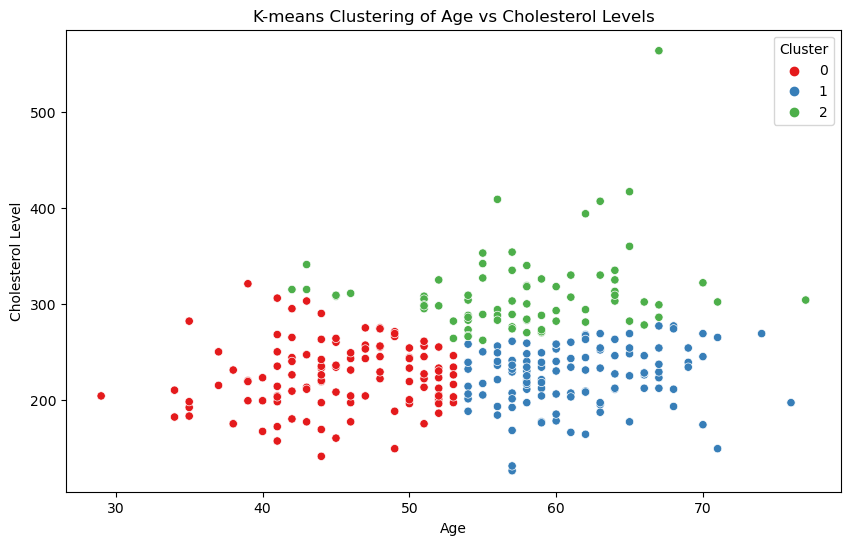

In [12]:
# Apply K-means clustering with specified number of clusters and single initialization
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
clusters = kmeans.fit_predict(X_normalized)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='Set1', legend='full')
plt.title('K-means Clustering of Age vs Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Cluster')
plt.show()

Even though there is a slight increase in cholesterol level as age increases, most of our data points have about the same cholesterol level (around 200-400), with a few outlier of abnomaly high chol level in the age of 70.

C:\Users\vnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


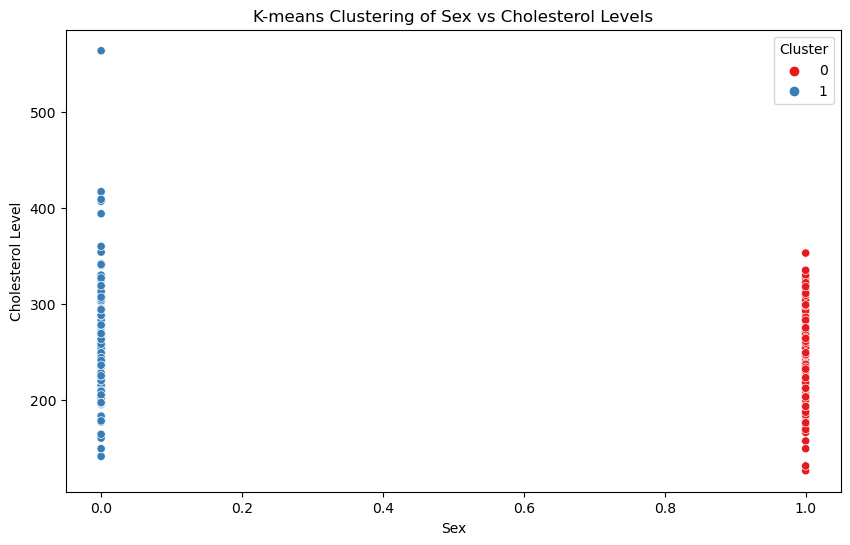

In [13]:
# Visualize the clusters
# Select relevant features for clustering (e.g., age and cholesterol levels)
X = data[:, [1, 4]]  # 'sex' is the second column and 'chol' is the fifth column
X_normalized = scaler.fit_transform(X)

# Define the number of clusters (K)
k = 2

# Apply K-means clustering with specified number of clusters and single initialization
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
clusters = kmeans.fit_predict(X_normalized)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='Set1', legend='full')
plt.title('K-means Clustering of Sex vs Cholesterol Levels')
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.legend(title='Cluster')
plt.show()

Men generally have lower cholesterol level

In [14]:
def plot_kmeans(x_feature, y_feature, x_label, y_label, k):
    # Get x,y column indices
    x_ind = df.columns.get_loc(x_feature)
    y_ind = df.columns.get_loc(y_feature)
    
    X = data[:, [x_ind, y_ind]]
    X_normalized = scaler.fit_transform(X)

    # Apply K-means clustering with specified number of clusters and single initialization
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    clusters = kmeans.fit_predict(X_normalized)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='Set1', legend='full')
    plt.title('K-means Clustering of {} vs {} Levels'.format(x_label, y_label))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title='Cluster')
    plt.show()

C:\Users\vnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


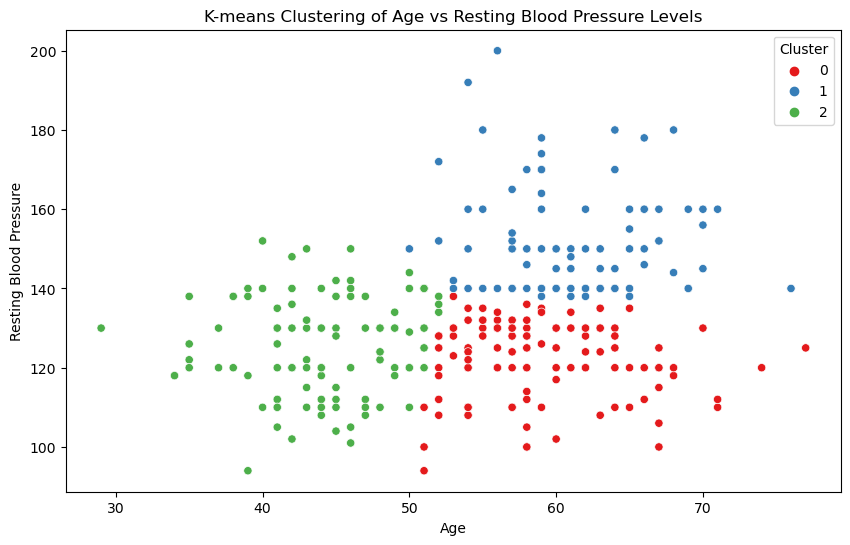

C:\Users\vnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


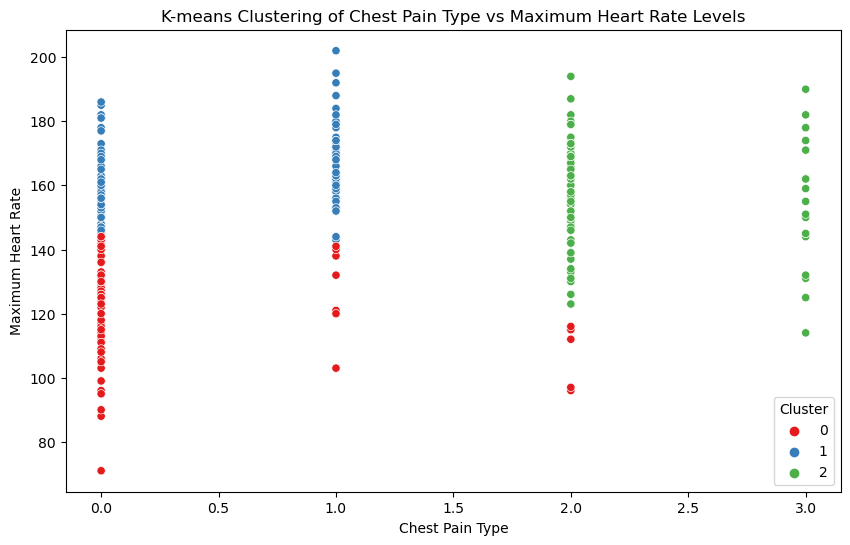

C:\Users\vnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


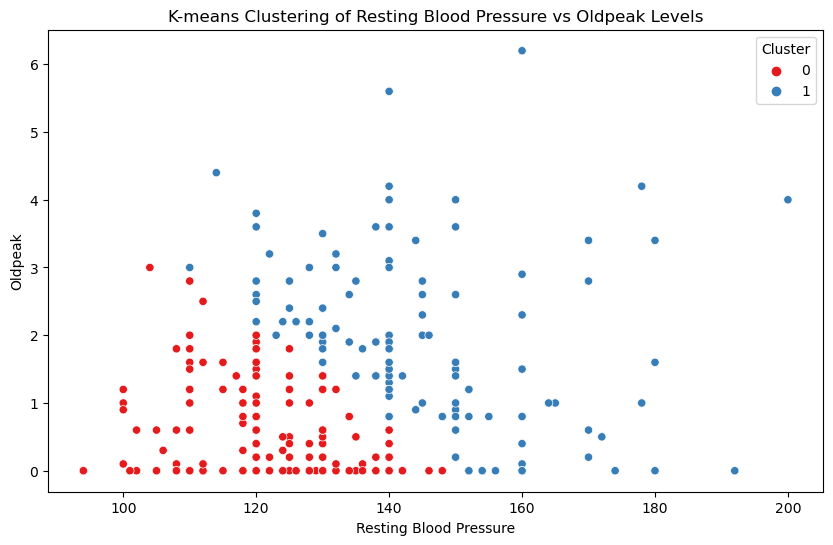

In [15]:
plot_kmeans('age', 'trestbps', 'Age', 'Resting Blood Pressure', 3)
plot_kmeans('cp', 'thalach', 'Chest Pain Type', 'Maximum Heart Rate', 3)
plot_kmeans('trestbps', 'oldpeak', 'Resting Blood Pressure', 'Oldpeak', 2)